In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [5]:
# 读取数据集
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [6]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float')

In [7]:
# 标准化
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [8]:
# 将label进行编码转换
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [12]:
# 以下开始搭建卷积神经网络
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [14]:
model = Sequential()
# 卷积层1
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
# 池化层1
model.add(MaxPooling2D(pool_size=(2,2)))
# 卷积层2
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
# 池化层2
model.add(MaxPooling2D(pool_size=(2,2)))

# dropout正则化
model.add(Dropout(0.25))

# 建立平坦层 将 输出向量化
model.add(Flatten())

# 建立隐藏层
model.add(Dense(128, activation='relu'))

# dropout正则化
model.add(Dropout(0.5))

# 建立输出层
model.add(Dense(10, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________

In [15]:
# 开始训练
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, epochs=10, batch_size=300, verbose=2)

Epoch 1/10
 - 98s - loss: 0.4686 - acc: 0.8518
Epoch 2/10
 - 91s - loss: 0.1277 - acc: 0.9621
Epoch 3/10
 - 93s - loss: 0.0918 - acc: 0.9730
Epoch 4/10
 - 94s - loss: 0.0724 - acc: 0.9777
Epoch 5/10
 - 93s - loss: 0.0631 - acc: 0.9812
Epoch 6/10
 - 106s - loss: 0.0547 - acc: 0.9834
Epoch 7/10
 - 100s - loss: 0.0482 - acc: 0.9854
Epoch 8/10
 - 96s - loss: 0.0434 - acc: 0.9869
Epoch 9/10
 - 99s - loss: 0.0386 - acc: 0.9879
Epoch 10/10
 - 96s - loss: 0.0359 - acc: 0.9887


In [19]:
# 下面就是通过读取train_history来显示训练的详细过程
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    # 这三个参数分别是：（之前训练产生的train_history，训练集的结果，验证集的结果）
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    
    plt.show()

KeyError: 'val_loss'

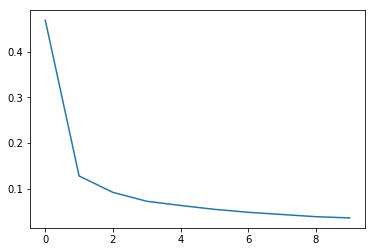

In [21]:
show_train_history(train_history, 'loss', 'val_loss')